In [122]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

MTH220  
4.3 Assignment  
07/18/2025  
J.D.M  

## Consider the equation:
$$ \Large
x \cdot \sin(x) -5 = 0
$$


In [123]:
x = sp.symbols('x')
expr = x * sp.sin(x) -5
expr

x*sin(x) - 5

### For this situation, what is f'(x)?
$$
f'(x) = x \cos(x) + sin(x)
$$

In [124]:
dif = expr.diff()
dif

x*cos(x) + sin(x)

### Set up an Excel spreadsheet, or a program in your favorite programming language, to find solutions to the above equation.  
#### (Submit this file along with your answers to the questions.)


In [125]:
# There are an infinite number of solutions, so something like sp.solve(expr, x) fails

try:
    sp.solve(expr, x)
except Exception as e:
    print("An error occurred while trying to solve symbolically:")
    print(e)

An error occurred while trying to solve symbolically:
multiple generators [x, sin(x)]
No algorithms are implemented to solve equation x*sin(x) - 5


In [126]:
# Instead we can use sympy's nsolve(), which is similar to newton's method below

guesses = range(0,20,2) # Count by 2 from 0 to 20
solutions = []
for guess in guesses:
    solutions.append( sp.nsolve(expr, x, guess))

unique_solutions = np.unique(solutions)
print(unique_solutions)

[-7.06889140339507 7.06889140339507 8.82222135255200 12.9623715794244
 15.3767763397125 19.1142203020956 34.4117036090011]


### Starting with a guess of x = 5, what solution does Newton's method converge to?  
#### (Run the method until the x values don't change in the first five decimal places.)


In [127]:
## I'll just pull out my handy function that I've already written:

def newton_method(expr, x0, wrt=x, tol=1e-6, max_iter=20, print_steps=True):
    # Start with finding the derivative of our expression
    d_expr = expr.diff(wrt) 
    # Convert both into numerical functions
    f = sp.lambdify(wrt, expr)
    df = sp.lambdify(wrt, d_expr)
    
    xi = x0 # Start with current guess
    for i in range(max_iter):
        yi = f(xi)  # Current y-value
        mi = df(xi) # Current slope
        # We need to make sure slope is not 0
        if mi == 0:
            raise ZeroDivisionError("Derivative is zero. No convergence.")
        # Find the x-intercept of the tangent line
        x_intercept = xi - yi/mi
        # The x-intercept is closer to the root so it becomes the next guess
        x_next = x_intercept

        if print_steps:
            print(f"Step {i+1}: x = {x_next}")

        # Check how much our guess improved
        if abs(x_next - xi) < tol:
            if print_steps:
                print(f"Root ≈ {x_next}")
            return x_next
        
        xi = x_next # Set the guess for next loop

    # If loop runs fully, failed to converge
    raise RuntimeError("Newton's method did not converge.")

In [128]:
newton_method(expr, 5, tol=1e-5)

Step 1: x = 26.3210839208127
Step 2: x = 24.51474725119062
Step 3: x = 25.504578808956957
Step 4: x = 25.327727554861784
Step 5: x = 25.331428357644384
Step 6: x = 25.331429171997417
Root ≈ 25.331429171997417


np.float64(25.331429171997417)

### There are five solutions to x sin x = 5 between x = 0 and x = 20 (it is at heart a sine wave, after all).  By varying your initial guess, find them all to within five decimal places.

In [129]:
# Similar to above, but using my own function

guesses = range(0,20,2) # Count by 2 from 0 to 20
solutions = []
for guess in guesses:
    guess += np.random.uniform(low=-.1, high=.1) # Sidestep ZeroDivision Error
    solutions.append( 
        np.round( newton_method(expr, guess, tol=1e-5, print_steps=False) , 5)
        )

# Trim down to the solutions we care about
unique_solutions = np.unique(solutions)
for solution in unique_solutions:
    if 0 < solution  < 20:
        print(solution)

7.06889
8.82222
12.96237
15.37678
19.11422


### Bonus: Graphing it

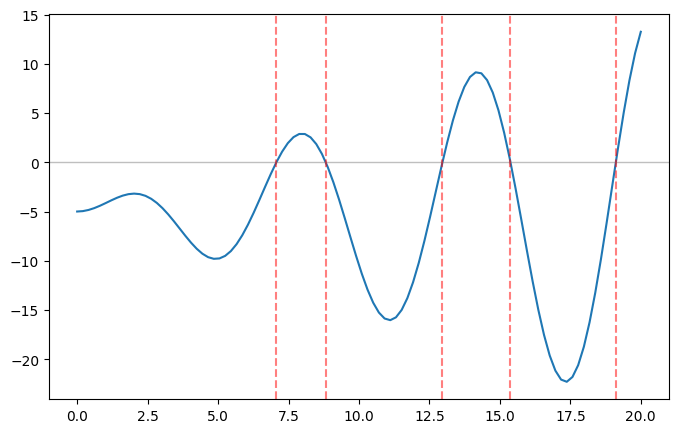

In [139]:
f = sp.lambdify(x, expr)
xs = np.linspace(0,20, 100)
ys = f(xs)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(xs, ys)
ax.axhline(0, color='gray', linewidth=1, alpha=0.5)

unique_solutions = np.unique(solutions)
for solution in unique_solutions:
    if 0 < solution  < 20:
        ax.axvline(solution, color='red', linestyle='--', alpha=0.5)